In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import arviz as az
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cellbayesassay as cba
import os.path
import re
import warnings
import attila_utils

## Data import

The next codeblock was used to remove 'nm' (not measurable?) values during the data cleaning process.

In [2]:
data_fpath = '../../resources/cell-based-assays/NIA_Tau_Infl_GFW-CO25360-v2-cleaned.xlsx'
data = cba.get_data(data_fpath, sheet_name='Sheet1', TI_fpath='../../resources/cell-based-assays/test-items3a-v2.csv')
data

Study                                   Experiment  Assay  Batch  \
0      CO25360                          Tau phosphorylation    Tau      1   
1      CO25360                          Tau phosphorylation    Tau      1   
2      CO25360                          Tau phosphorylation    Tau      1   
3      CO25360                          Tau phosphorylation    Tau      1   
4      CO25360                          Tau phosphorylation    Tau      1   
...        ...                                          ...    ...    ...   
10237  CO25360  Trophic factor withdrawal (primary neurons)  YOPRO      3   
10238  CO25360  Trophic factor withdrawal (primary neurons)  YOPRO      3   
10239  CO25360  Trophic factor withdrawal (primary neurons)  YOPRO      3   
10240  CO25360  Trophic factor withdrawal (primary neurons)  YOPRO      3   
10241  CO25360  Trophic factor withdrawal (primary neurons)  YOPRO      3   

       Plate    TI               Name conc  concentration  conc_log10  \
0          1   TI1      Valproic acid   c1        0.00005    -4.30103   
1          1   TI1      Valproic acid   c1        0.00005    -4.30103   
2          1   TI1      Valproic acid   c1        0.00005    -4.30103   
3          1   TI1      Valproic acid   c1        0.00005    -4.30103   
4          1   TI1      Valproic acid   c1        0.00005    -4.30103   
...      ...   ...                ...  ...            ...         ...   
10237      5  TI27  TUDCA + fixed HCQ   c3        0.00001    -5.00000   
10238      5  TI27  TUDCA + fixed HCQ   c3        0.00001    -5.00000   
10239      5  TI27  TUDCA + fixed HCQ   c3        0.00001    -5.00000   
10240      5  TI27  TUDCA + fixed HCQ   c3        0.00001    -5.00000   
10241      5  TI27  TUDCA + fixed HCQ   c3        0.00001    -5.00000   

       Activity  
0      445274.0  
1      364405.0  
2      458060.0  
3      490983.0  
4      408649.0  
...         ...  
10237     109.7  
10238     110.6  
10239     113.4  
10240      97.0  
10241     102.1  

[10242 rows x 11 columns]

## Check data

In [3]:
check_data = True
if check_data:
    testdf = cba.fit_multiple_units(data, unit_list=None, do_fit=False, do_print=False, accept_multi_batches=True)
    print(testdf)

CO25360 LPS neuroinflammation (BV2 cells) MTT TI23
treatment with multiple batches
                                                                  study  \
CO25360 LPS neuroinflammation (BV2 cells)           IFN-γ TI1   CO25360   
                                                          TI10  CO25360   
                                                          TI11  CO25360   
                                                          TI12  CO25360   
                                                          TI13  CO25360   
...                                                                 ...   
        Trophic factor withdrawal (primary neurons) YOPRO TI5   CO25360   
                                                          TI6   CO25360   
                                                          TI7   CO25360   
                                                          TI8   CO25360   
                                                          TI9   CO25360   

                

CO25360 LPS neuroinflammation (BV2 cells) MTT TI23
treatment with multiple batches


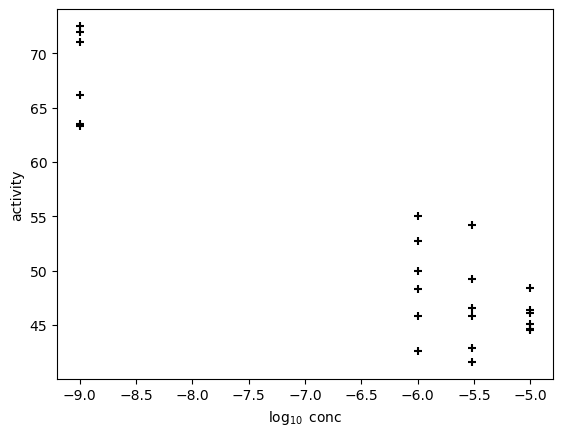

In [4]:
def data_plotter(study='CO25360', exper='LPS neuroinflammation (BV2 cells)', assay='MTT', TI='TI23', data=data, return_data_reshaped=False):
    fig, ax = plt.subplots()
    data_reshaped = cba.extract_regr_data(study, exper, assay, TI, data, return_data_reshaped=True, accept_multi_batches=True)
    if return_data_reshaped:
        return(data_reshaped)
    ax = cba.plot_data(ax, data_reshaped)
    return((fig, ax))

fig, ax = data_plotter(exper='LPS neuroinflammation (BV2 cells)', assay='MTT', TI='TI23')

In [5]:
data_reshaped = cba.extract_regr_data('CO25360', 'LPS neuroinflammation (BV2 cells)', 'MTT', 'TI23', data, return_data_reshaped=True, accept_multi_batches=True)
data_reshaped

CO25360 LPS neuroinflammation (BV2 cells) MTT TI23
treatment with multiple batches


Study                         Experiment Assay  Batch  Plate    TI  \
7920  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4   LPS   
7921  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4   LPS   
7922  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4   LPS   
7923  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4   LPS   
7924  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4   LPS   
7925  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4   LPS   
7902  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7903  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7904  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7905  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7906  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7907  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7908  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7909  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7910  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7911  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7912  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7913  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7914  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7915  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7916  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7917  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7918  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   
7919  CO25360  LPS neuroinflammation (BV2 cells)   MTT      3      4  TI23   

            Name conc  concentration  conc_log10  Activity  std_activity  
7920              LPS   1.000000e-09   -9.000000      86.0     63.307561  
7921              LPS   1.000000e-09   -9.000000      86.2     63.454788  
7922              LPS   1.000000e-09   -9.000000      89.9     66.178485  
7923              LPS   1.000000e-09   -9.000000      96.5     71.036972  
7924              LPS   1.000000e-09   -9.000000      98.5     72.509241  
7925              LPS   1.000000e-09   -9.000000      97.7     71.920334  
7902  Rifampicin   c1   1.000000e-05   -5.000000      63.0     46.376469  
7903  Rifampicin   c1   1.000000e-05   -5.000000      60.5     44.536133  
7904  Rifampicin   c1   1.000000e-05   -5.000000      60.6     44.609746  
7905  Rifampicin   c1   1.000000e-05   -5.000000      65.8     48.437645  
7906  Rifampicin   c1   1.000000e-05   -5.000000      61.2     45.051427  
7907  Rifampicin   c1   1.000000e-05   -5.000000      62.6     46.082015  
7908  Rifampicin   c2   3.000000e-06   -5.522879      63.2     46.523696  
7909  Rifampicin   c2   3.000000e-06   -5.522879      58.2     42.843024  
7910  Rifampicin   c2   3.000000e-06   -5.522879      56.5     41.591595  
7911  Rifampicin   c2   3.000000e-06   -5.522879      62.3     45.861175  
7912  Rifampicin   c2   3.000000e-06   -5.522879      66.9     49.247393  
7913  Rifampicin   c2   3.000000e-06   -5.522879      73.6     54.179494  
7914  Rifampicin   c3   1.000000e-06   -6.000000      65.6     48.290418  
7915  Rifampicin   c3   1.000000e-06   -6.000000      57.9     42.622183  
7916  Rifampicin   c3   1.000000e-06   -6.000000      62.2     45.787561  
7917  Rifampicin   c3   1.000000e-06   -6.000000      67.9     49.983528  
7918  Rifampicin   c3   1.000000e-06   -6.000000      74.8     55.062855  
7919  Rifampicin   c3   1.000000e-06   -6.000000      71.6     52.707225

In [6]:
a = data.loc[data.TI.apply(lambda x: bool(re.match('^TI.*', x)))].groupby(['Study', 'Experiment', 'Assay', 'TI']).first().index.to_numpy()

def get_num_missing_points(study, experiment, assay, TI, data=data):
    data_reshaped = cba.extract_regr_data(study, experiment, assay, TI, data=data, accept_multi_batches=True, return_data_reshaped=True)
    data_reshaped.loc[~data_reshaped.conc.isin(['c1', 'c2', 'c3']), 'conc'] = 'zero'
    data_reshaped['TI'] = TI
    val = data_reshaped.groupby('conc').apply(lambda df: df.Activity.isna().sum())
    df = pd.DataFrame(val.to_numpy(), index=val.index, columns=pd.MultiIndex.from_tuples([(study, experiment, assay, TI)]))
    df = df.transpose()
    return(df)

missing_points = pd.concat([get_num_missing_points(*args) for args in a])
missing_points

CO25360 LPS neuroinflammation (BV2 cells) MTT TI23
treatment with multiple batches


conc                                                            c1  c2  c3  \
CO25360 LPS neuroinflammation (BV2 cells)           IFN-γ TI1    1   0   3   
                                                          TI10   5   1   5   
                                                          TI11   1   3   1   
                                                          TI12   1   1   5   
                                                          TI13   1   6   1   
...                                                             ..  ..  ..   
        Trophic factor withdrawal (primary neurons) YOPRO TI5    0   0   0   
                                                          TI6    0   0   0   
                                                          TI7    0   0   0   
                                                          TI8    0   0   0   
                                                          TI9    0   0   0   

conc                                                            zero  
CO25360 LPS neuroinflammation (BV2 cells)           IFN-γ TI1      1  
                                                          TI10     0  
                                                          TI11     0  
                                                          TI12     1  
                                                          TI13     1  
...                                                              ...  
        Trophic factor withdrawal (primary neurons) YOPRO TI5      0  
                                                          TI6      1  
                                                          TI7      1  
                                                          TI8      1  
                                                          TI9      1  

[486 rows x 4 columns]

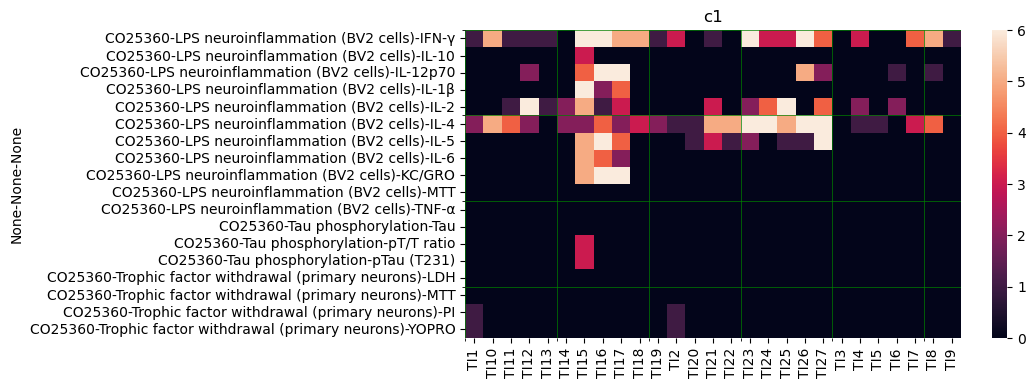

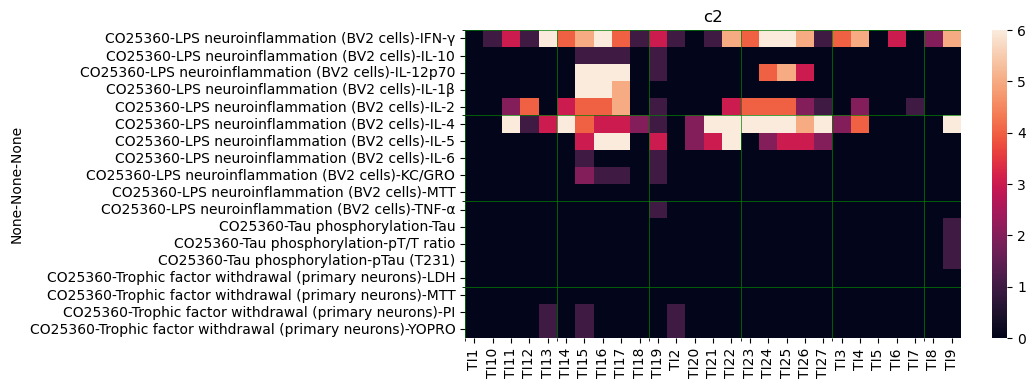

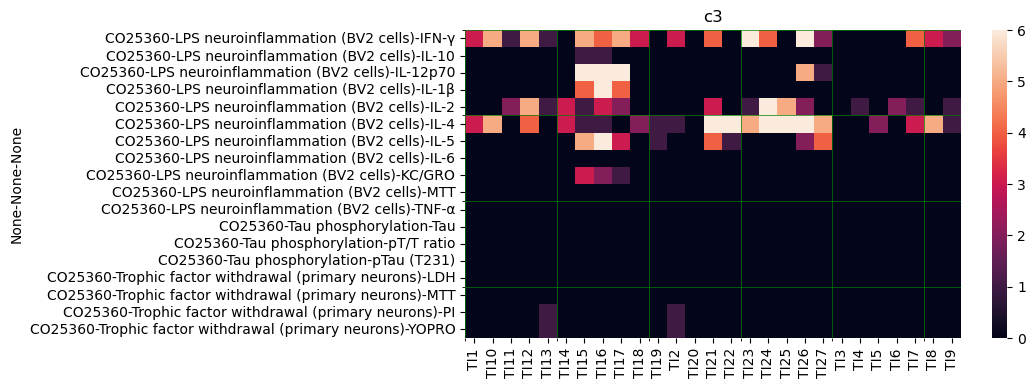

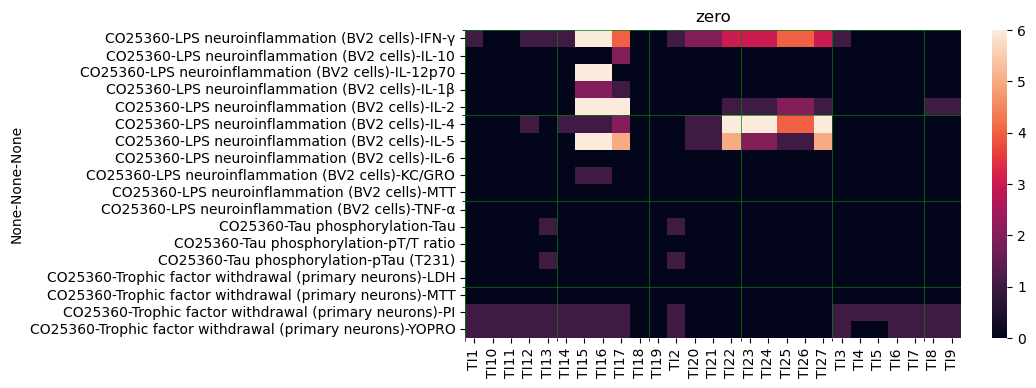

In [7]:
for c in missing_points.columns:
    fig, ax = plt.subplots(figsize=(8, 4))
    df = missing_points[c].unstack(3)
    sns.heatmap(df, ax=ax)
    step = 5
    ax.set_xticks(np.arange(df.shape[1], step=step), minor=True)
    ax.set_yticks(np.arange(df.shape[0], step=step), minor=True)
    ax.grid(which='minor', color='green', linewidth=0.5)
    ax.set_title(c)

## Fitting model

In [8]:
maindir = '../../results/2024-05-14-cell-bayes/'

if not os.path.exists(maindir + 'idatas/fpaths.csv'):
    idatadf = cba.fit_multiple_units(data, unit_list=None, accept_multi_batches=True)
    idatas = idatadf.idata
    fpathdf = cba.idatas_to_netcdf(idatas.dropna(), subdir='idatas/', maindir=maindir)
    print('idatas written to netcdf')
else:
    idatas = cba.idatas_from_netcdf(subdir='idatas/', maindir=maindir)
    print('idatas read from netcdf')

idatas = cba.sort_index_TI(idatas)
idatas

idatas read from netcdf


study    experiment                                   assay  TI  
CO25360  LPS neuroinflammation (BV2 cells)            IFN-γ  TI1     (posterior, log_likelihood, sample_stats, obse...
                                                             TI2     (posterior, log_likelihood, sample_stats, obse...
                                                             TI3     (posterior, log_likelihood, sample_stats, obse...
                                                             TI4     (posterior, log_likelihood, sample_stats, obse...
                                                             TI5     (posterior, log_likelihood, sample_stats, obse...
                                                                                           ...                        
         Trophic factor withdrawal (primary neurons)  YOPRO  TI23    (posterior, log_likelihood, sample_stats, obse...
                                                             TI24    (posterior, log_likelihood, samp

## Fitted curves: posterior sample

In [9]:
plot_sampled_curves = False
fpath_suffix = '' if plot_sampled_curves else '-no-curves'

def assay_plotter(experiment, assay, plot_sampled_curves=plot_sampled_curves, compound_name_title=True):
    unit_list = idatas.loc(axis=0)[:, experiment, assay, :].index.to_numpy()
    fig, ax = cba.plot_multiple_units(unit_list, data, idatas, plot_sampled_curves=plot_sampled_curves, compound_name_title=compound_name_title)
    fig.suptitle(experiment + '\n' + assay)
    return((fig, ax))

for e, a in data[['Experiment', 'Assay']].apply(lambda x: (x.iloc[0], x.iloc[1]), axis=1).unique():
    print(e, a)

Tau phosphorylation Tau
Tau phosphorylation pTau (T231)
Tau phosphorylation pT/T ratio
LPS neuroinflammation (BV2 cells) TNF-α
LPS neuroinflammation (BV2 cells) KC/GRO
LPS neuroinflammation (BV2 cells) IL-6
LPS neuroinflammation (BV2 cells) IL-1β
LPS neuroinflammation (BV2 cells) IL-12p70
LPS neuroinflammation (BV2 cells) IL-5
LPS neuroinflammation (BV2 cells) IFN-γ
LPS neuroinflammation (BV2 cells) IL-10
LPS neuroinflammation (BV2 cells) IL-2
LPS neuroinflammation (BV2 cells) IL-4
LPS neuroinflammation (BV2 cells) MTT
Trophic factor withdrawal (primary neurons) LDH
Trophic factor withdrawal (primary neurons) MTT
Trophic factor withdrawal (primary neurons) PI
Trophic factor withdrawal (primary neurons) YOPRO


['named-figure/fitted-curves-Tau-phosphorylation-Tau-no-curves.png',
 'named-figure/fitted-curves-Tau-phosphorylation-Tau-no-curves.pdf']

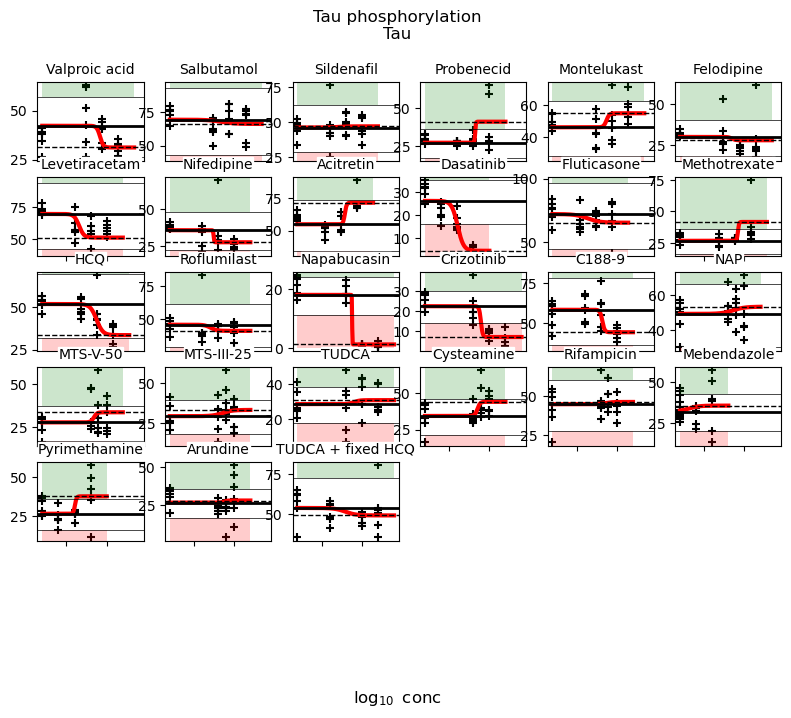

In [10]:
experiment = 'Tau phosphorylation'
assay = 'Tau'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-Tau-phosphorylation-pTau-T231--no-curves.png',
 'named-figure/fitted-curves-Tau-phosphorylation-pTau-T231--no-curves.pdf']

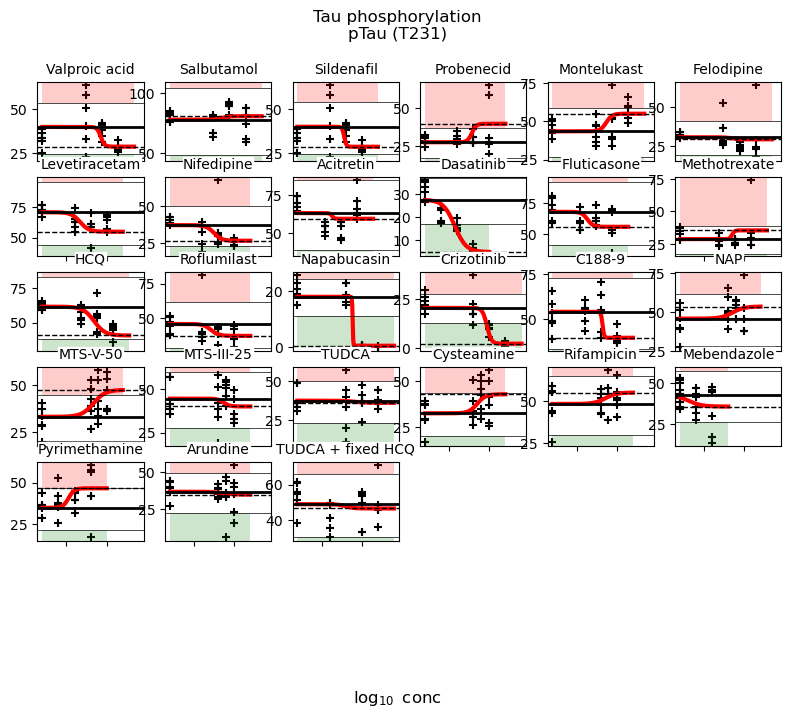

In [11]:
experiment = 'Tau phosphorylation'
assay = 'pTau (T231)'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-Tau-phosphorylation-pT-T-ratio-no-curves.png',
 'named-figure/fitted-curves-Tau-phosphorylation-pT-T-ratio-no-curves.pdf']

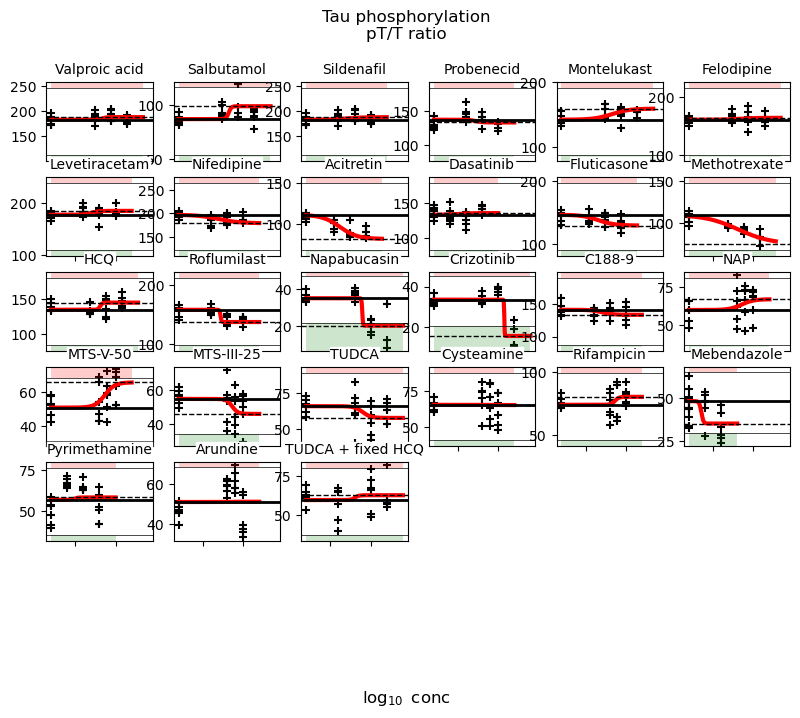

In [12]:
experiment = 'Tau phosphorylation'
assay = 'pT/T ratio'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-TNF-α-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-TNF-α-no-curves.pdf']

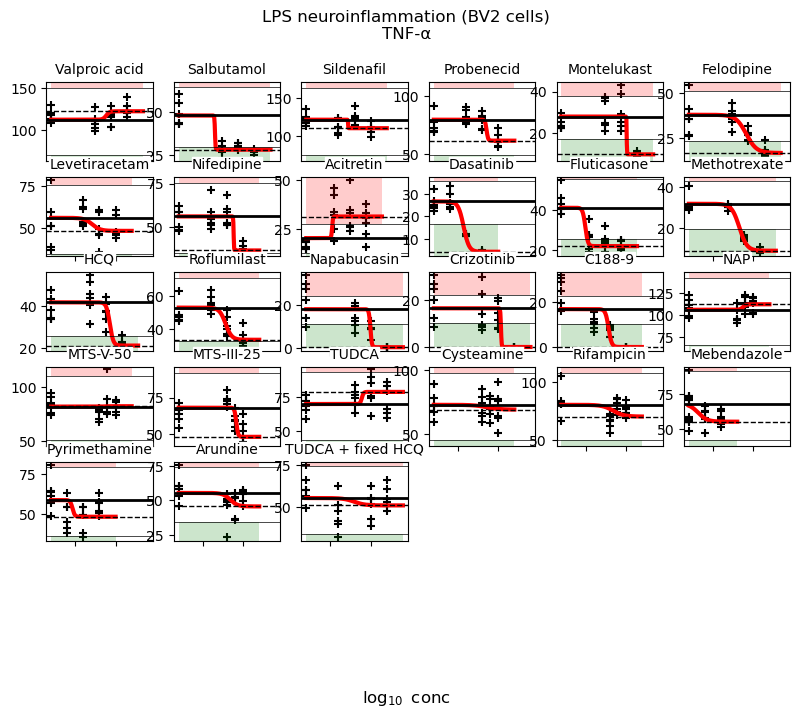

In [13]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'TNF-α'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-KC-GRO-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-KC-GRO-no-curves.pdf']

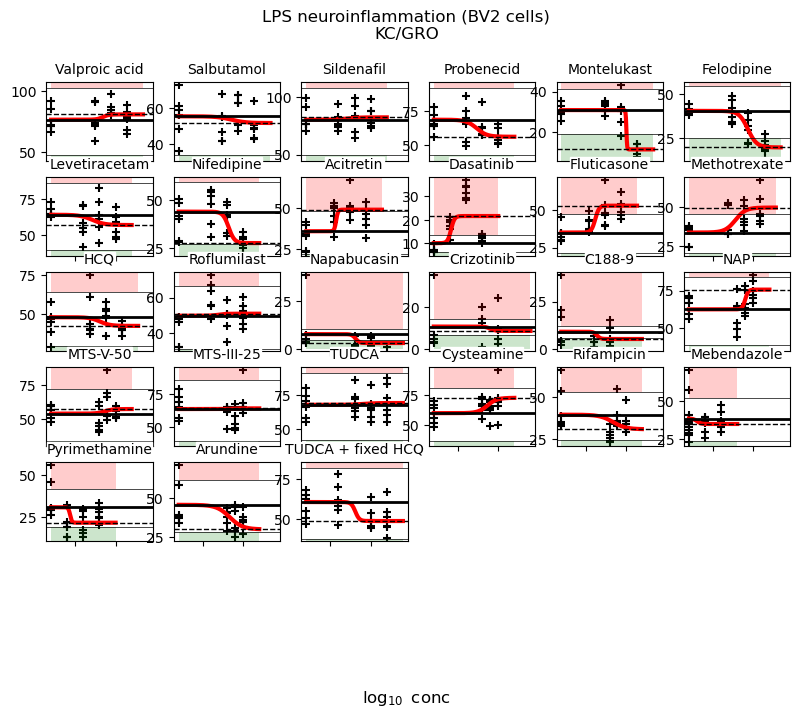

In [14]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'KC/GRO'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:267: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))


['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-6-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-6-no-curves.pdf']

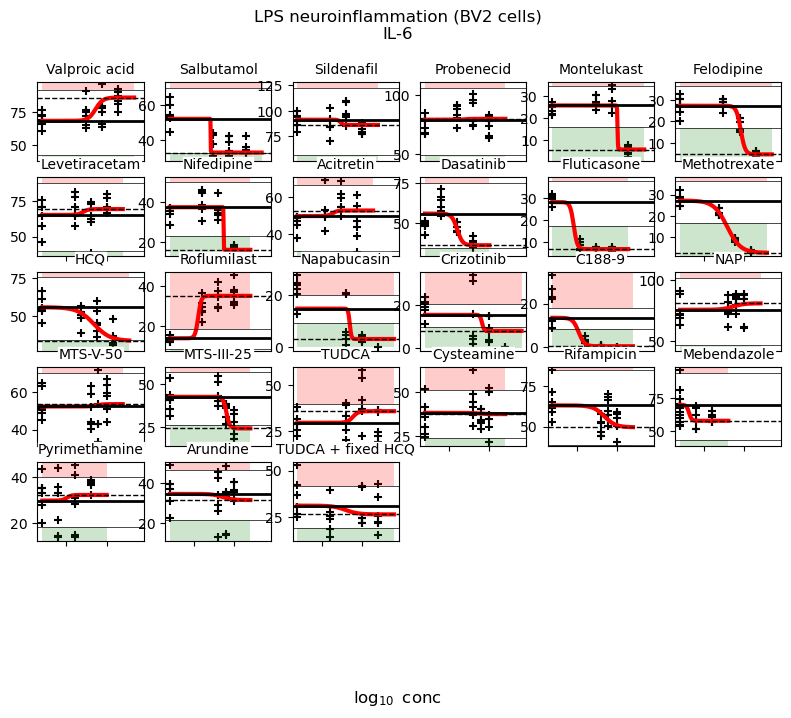

In [15]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'IL-6'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-1β-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-1β-no-curves.pdf']

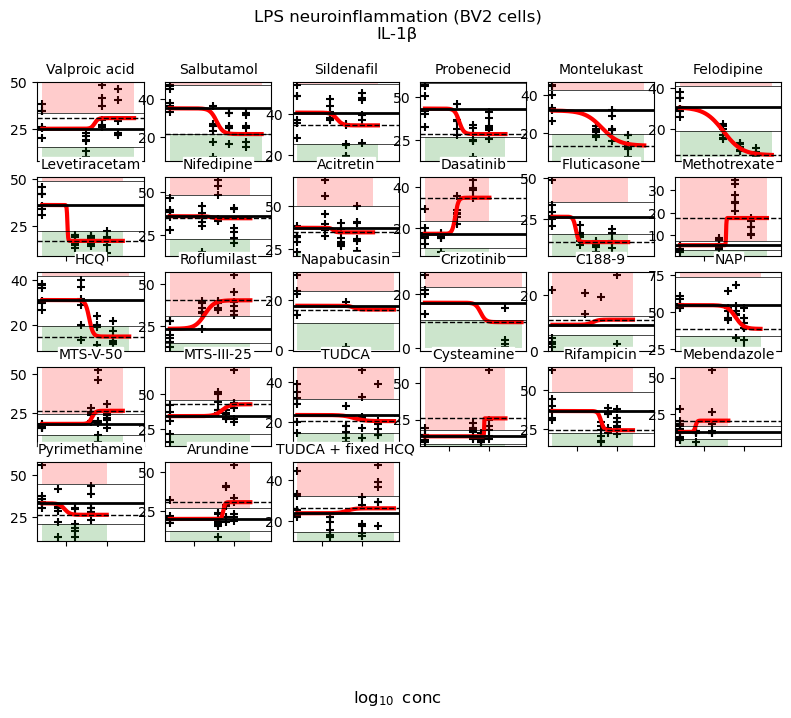

In [16]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'IL-1β'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-12p70-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-12p70-no-curves.pdf']

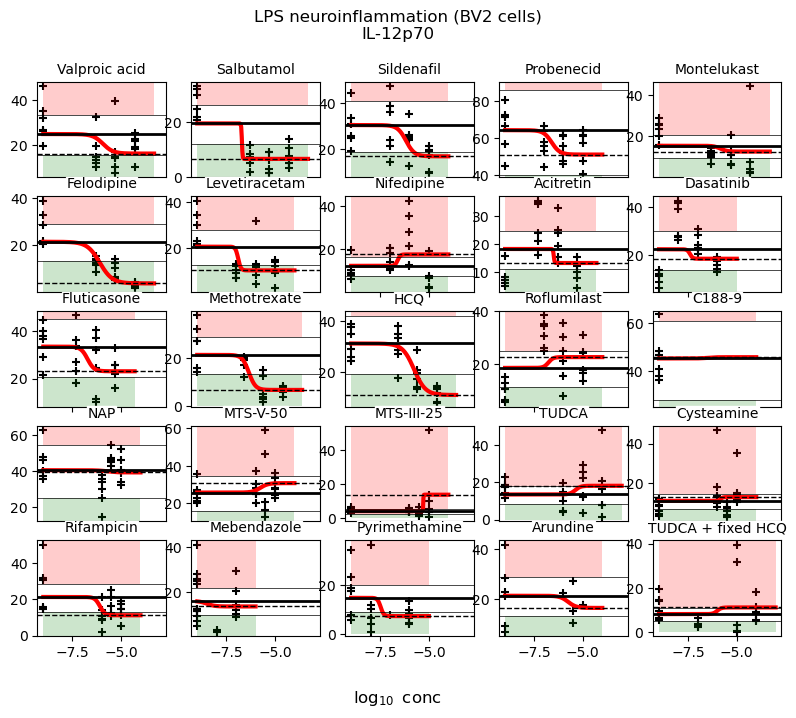

In [17]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'IL-12p70'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-5-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-5-no-curves.pdf']

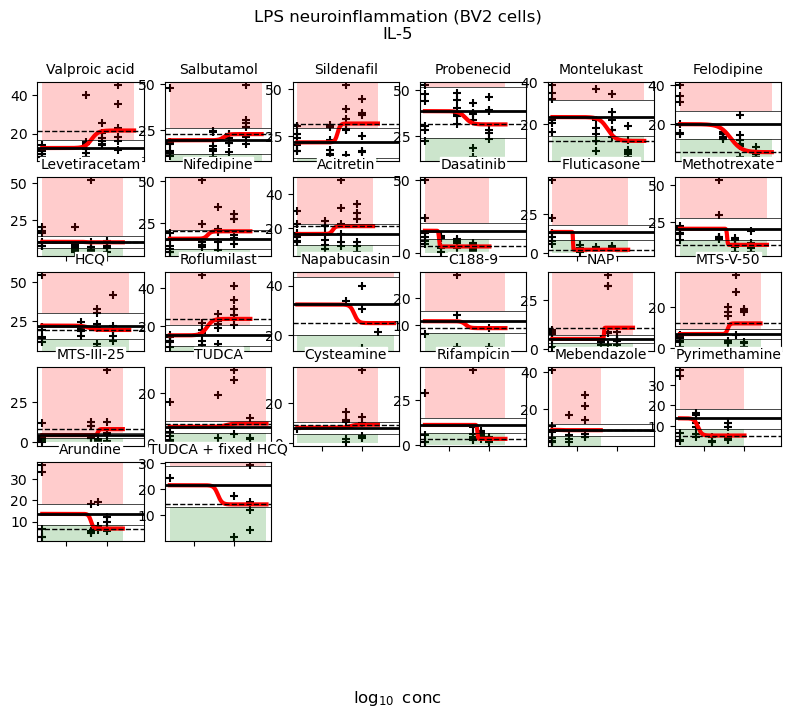

In [18]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'IL-5'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IFN-γ-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IFN-γ-no-curves.pdf']

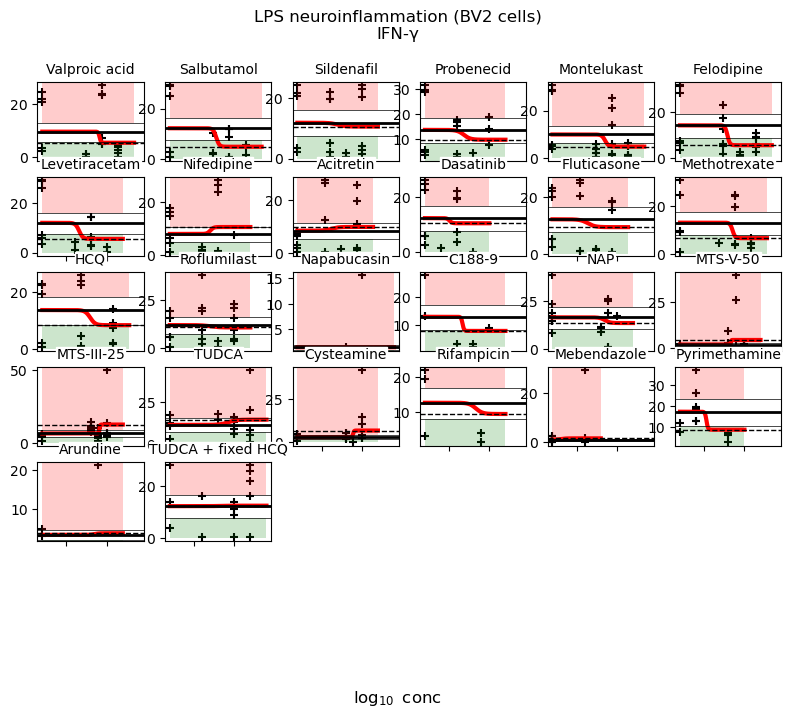

In [19]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'IFN-γ'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-10-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-10-no-curves.pdf']

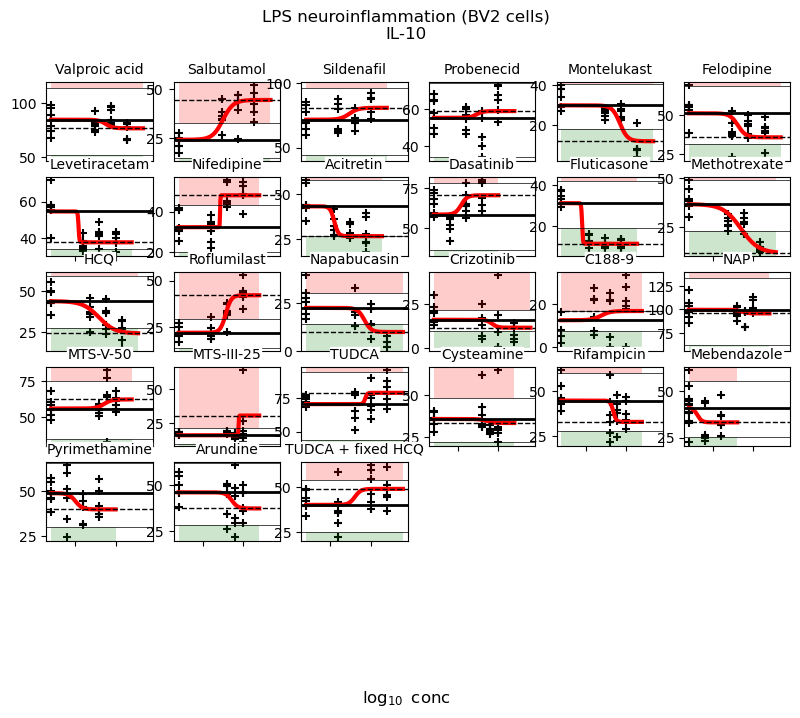

In [20]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'IL-10'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-2-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-2-no-curves.pdf']

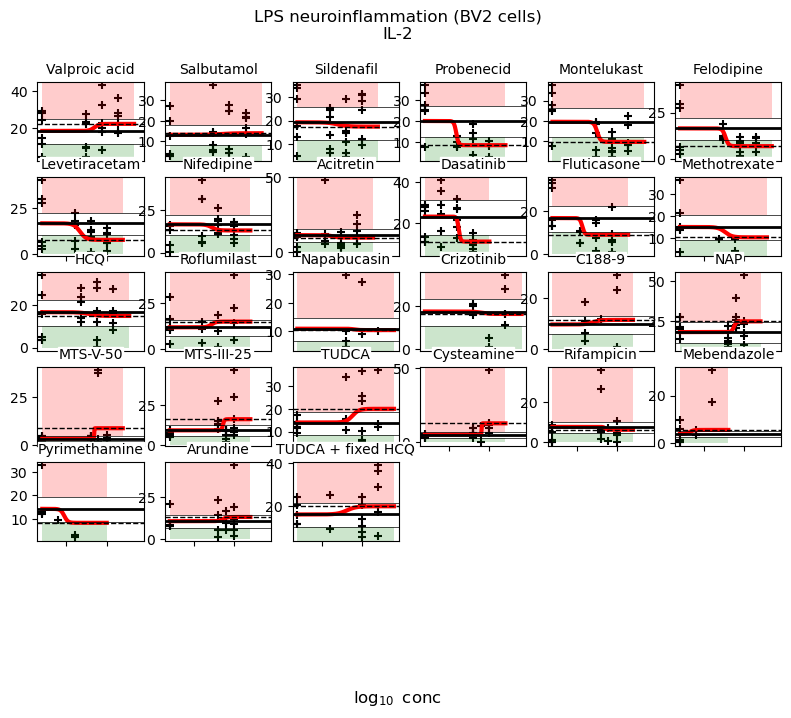

In [21]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'IL-2'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-4-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-IL-4-no-curves.pdf']

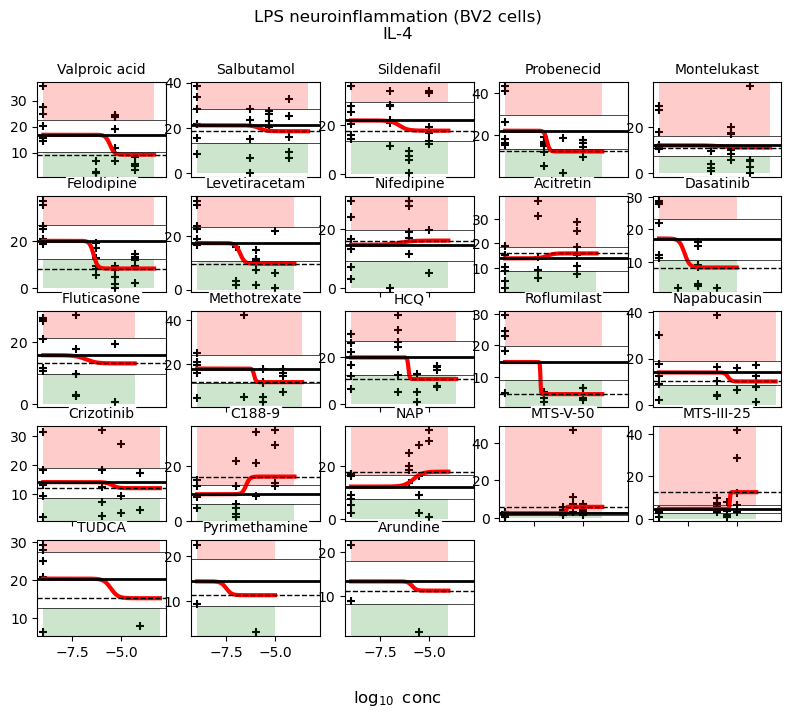

In [22]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'IL-4'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

CO25360 LPS neuroinflammation (BV2 cells) MTT TI23
treatment with multiple batches


['named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-MTT-no-curves.png',
 'named-figure/fitted-curves-LPS-neuroinflammation-BV2-cells-MTT-no-curves.pdf']

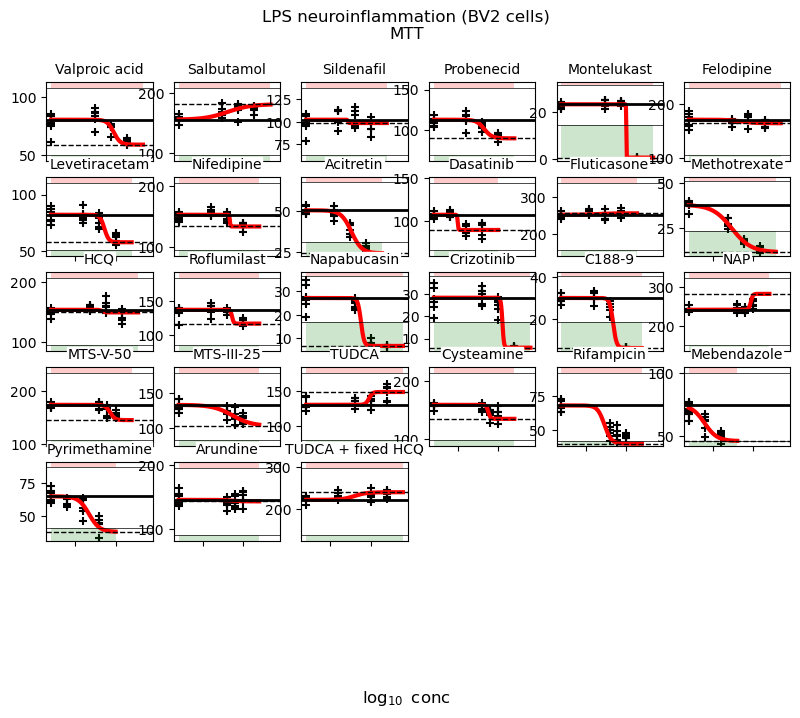

In [23]:
experiment = 'LPS neuroinflammation (BV2 cells)'
assay = 'MTT'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-Trophic-factor-withdrawal-primary-neurons-LDH-no-curves.png',
 'named-figure/fitted-curves-Trophic-factor-withdrawal-primary-neurons-LDH-no-curves.pdf']

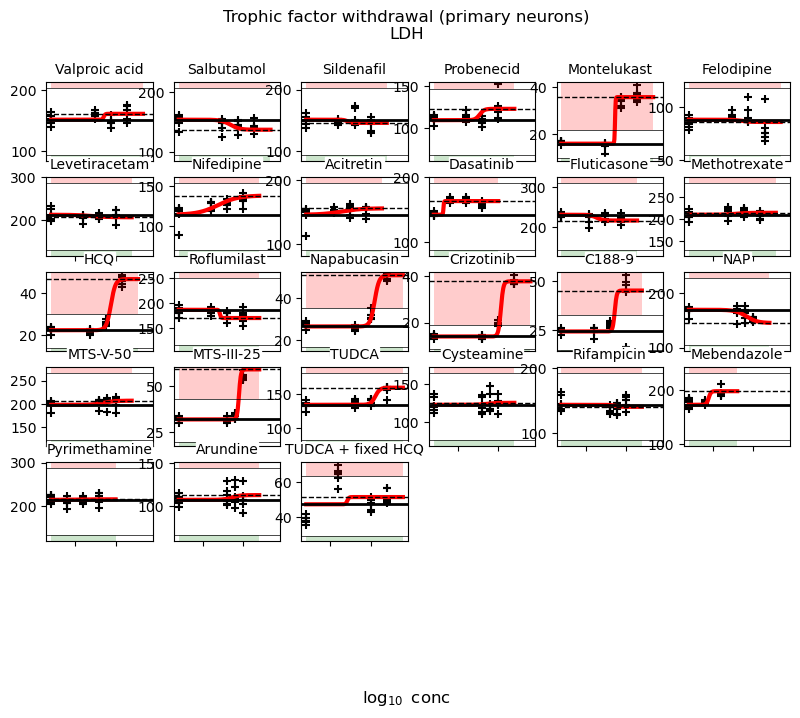

In [24]:
experiment = 'Trophic factor withdrawal (primary neurons)'
assay = 'LDH'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-Trophic-factor-withdrawal-primary-neurons-MTT-no-curves.png',
 'named-figure/fitted-curves-Trophic-factor-withdrawal-primary-neurons-MTT-no-curves.pdf']

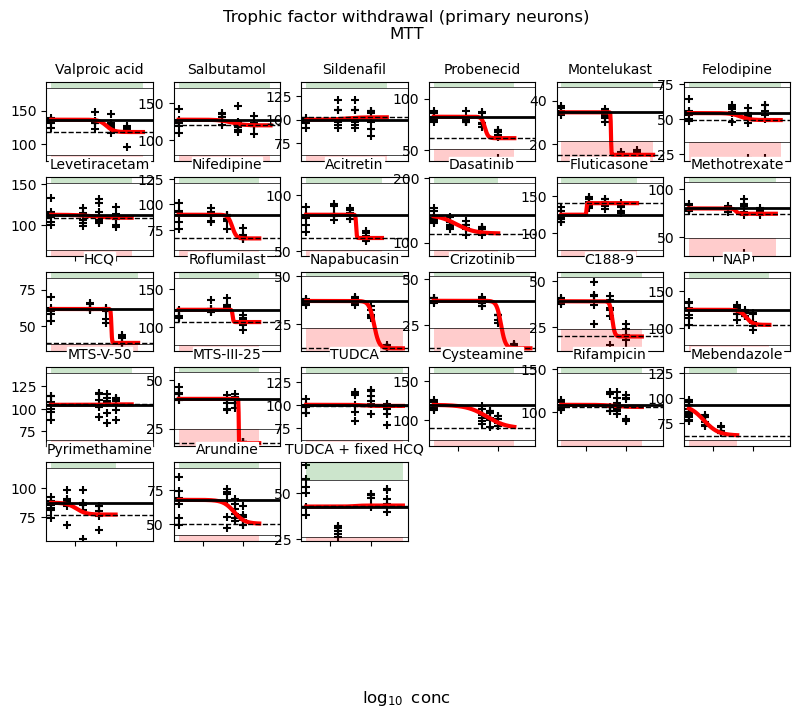

In [25]:
experiment = 'Trophic factor withdrawal (primary neurons)'
assay = 'MTT'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-Trophic-factor-withdrawal-primary-neurons-PI-no-curves.png',
 'named-figure/fitted-curves-Trophic-factor-withdrawal-primary-neurons-PI-no-curves.pdf']

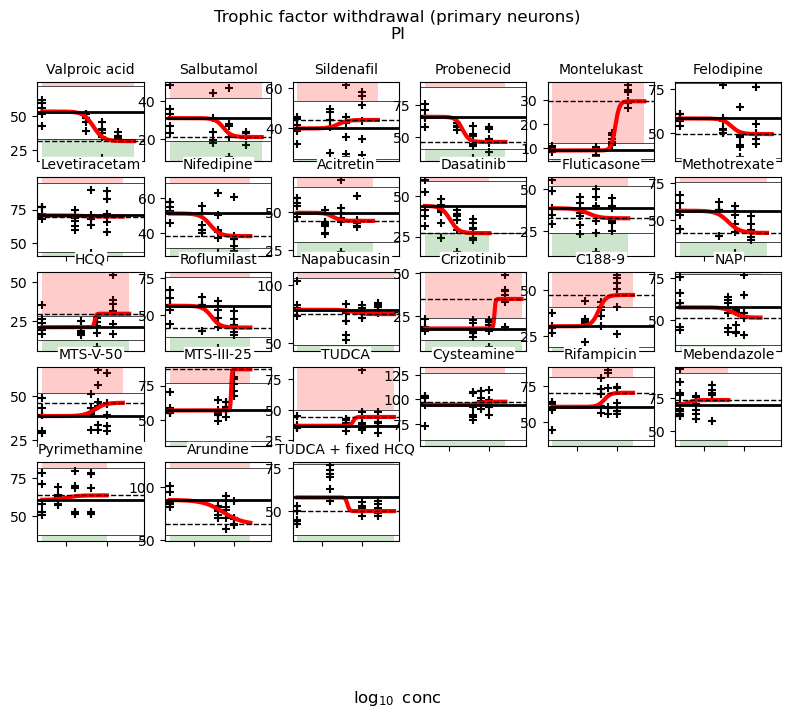

In [26]:
experiment = 'Trophic factor withdrawal (primary neurons)'
assay = 'PI'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

['named-figure/fitted-curves-Trophic-factor-withdrawal-primary-neurons-YOPRO-no-curves.png',
 'named-figure/fitted-curves-Trophic-factor-withdrawal-primary-neurons-YOPRO-no-curves.pdf']

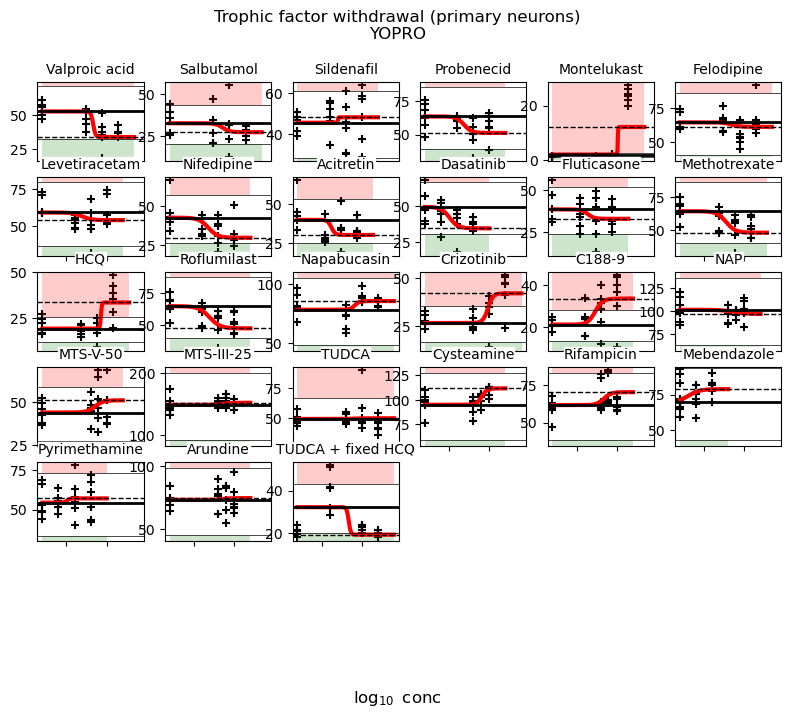

In [27]:
experiment = 'Trophic factor withdrawal (primary neurons)'
assay = 'YOPRO'
fig, ax = assay_plotter(experiment, assay)
attila_utils.savefig(fig, 'fitted-curves-' + re.sub('[ ()/]+', '-', experiment + ' ' + assay) + ('' if plot_sampled_curves else '-no-curves'))

## MCMC diagnostics

In [28]:
cba.get_diagnostics_series(idatas, az.ess)

In [29]:
cba.get_diagnostics_series(idatas, az.rhat, vmax=1.1)

In [30]:
df = cba.get_diagnostics_series(idatas, az.mcse, return_df=True).drop('k', level='parameter', axis=0)
df.style.format(precision=3).background_gradient(axis=None, vmin=df.min().min(), vmax=df.max().max(), cmap='hot')

['named-figure/ess.png', 'named-figure/ess.pdf']

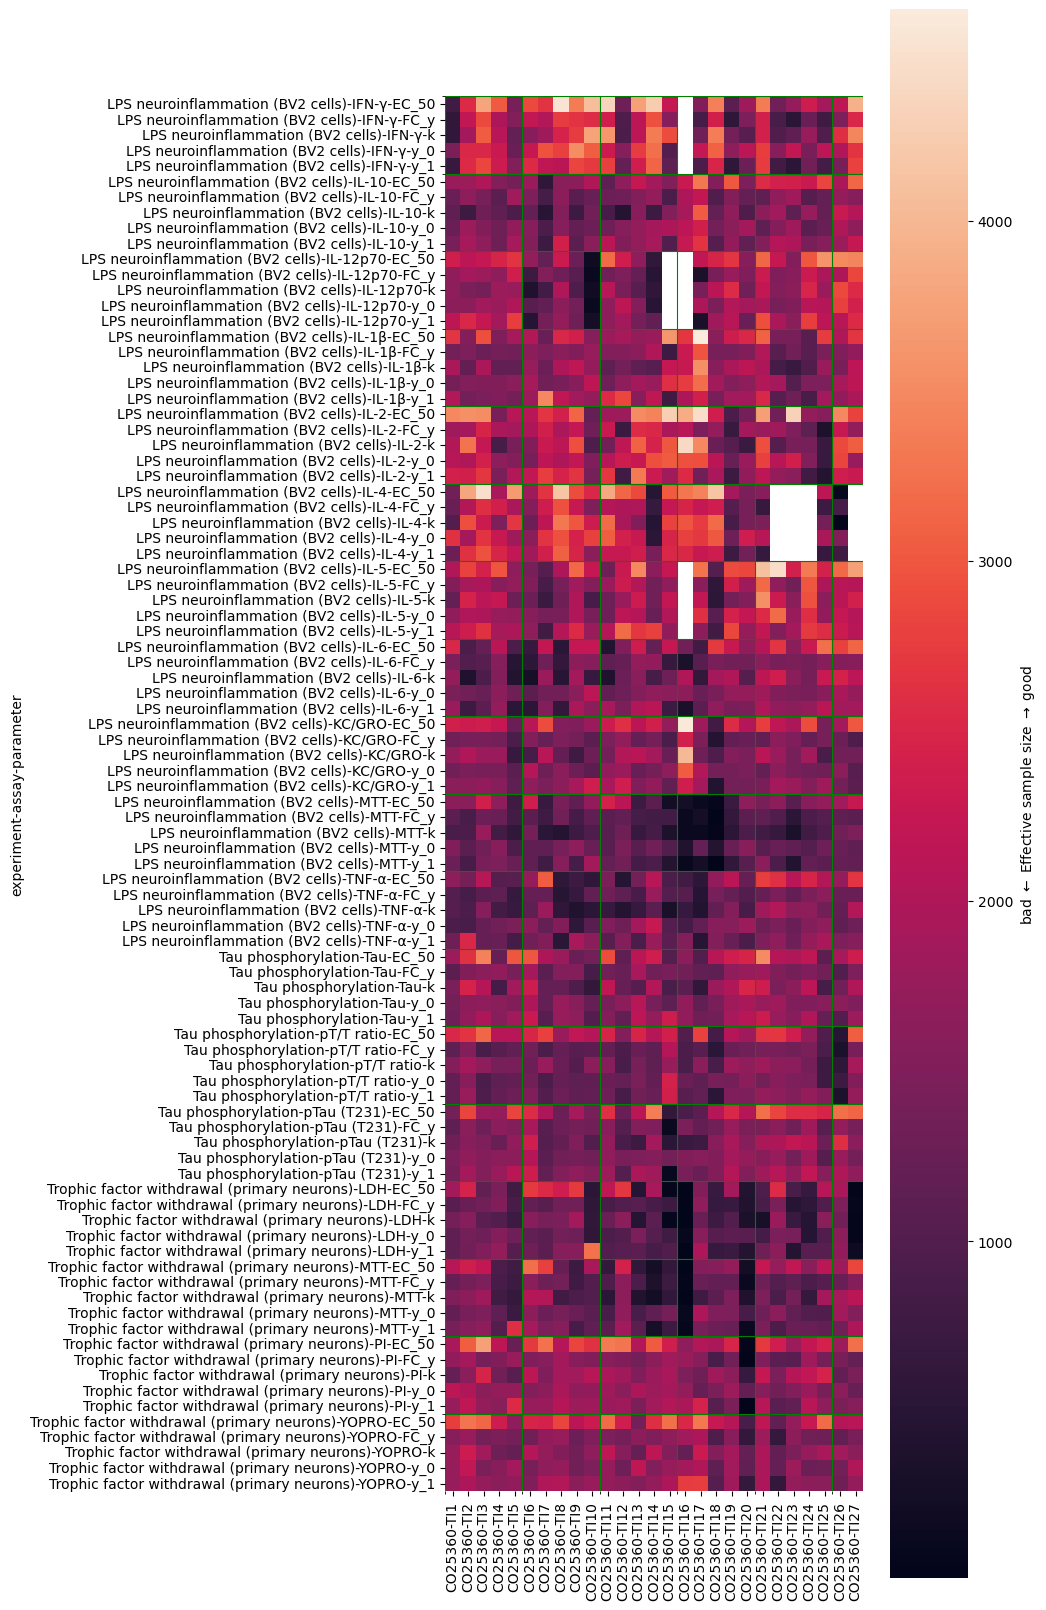

In [31]:
g = cba.diagnostics_series_heatmap(idatas, az.ess, yticklabels=True)
attila_utils.savefig(g.figure, 'ess')

['named-figure/rhat.png', 'named-figure/rhat.pdf']

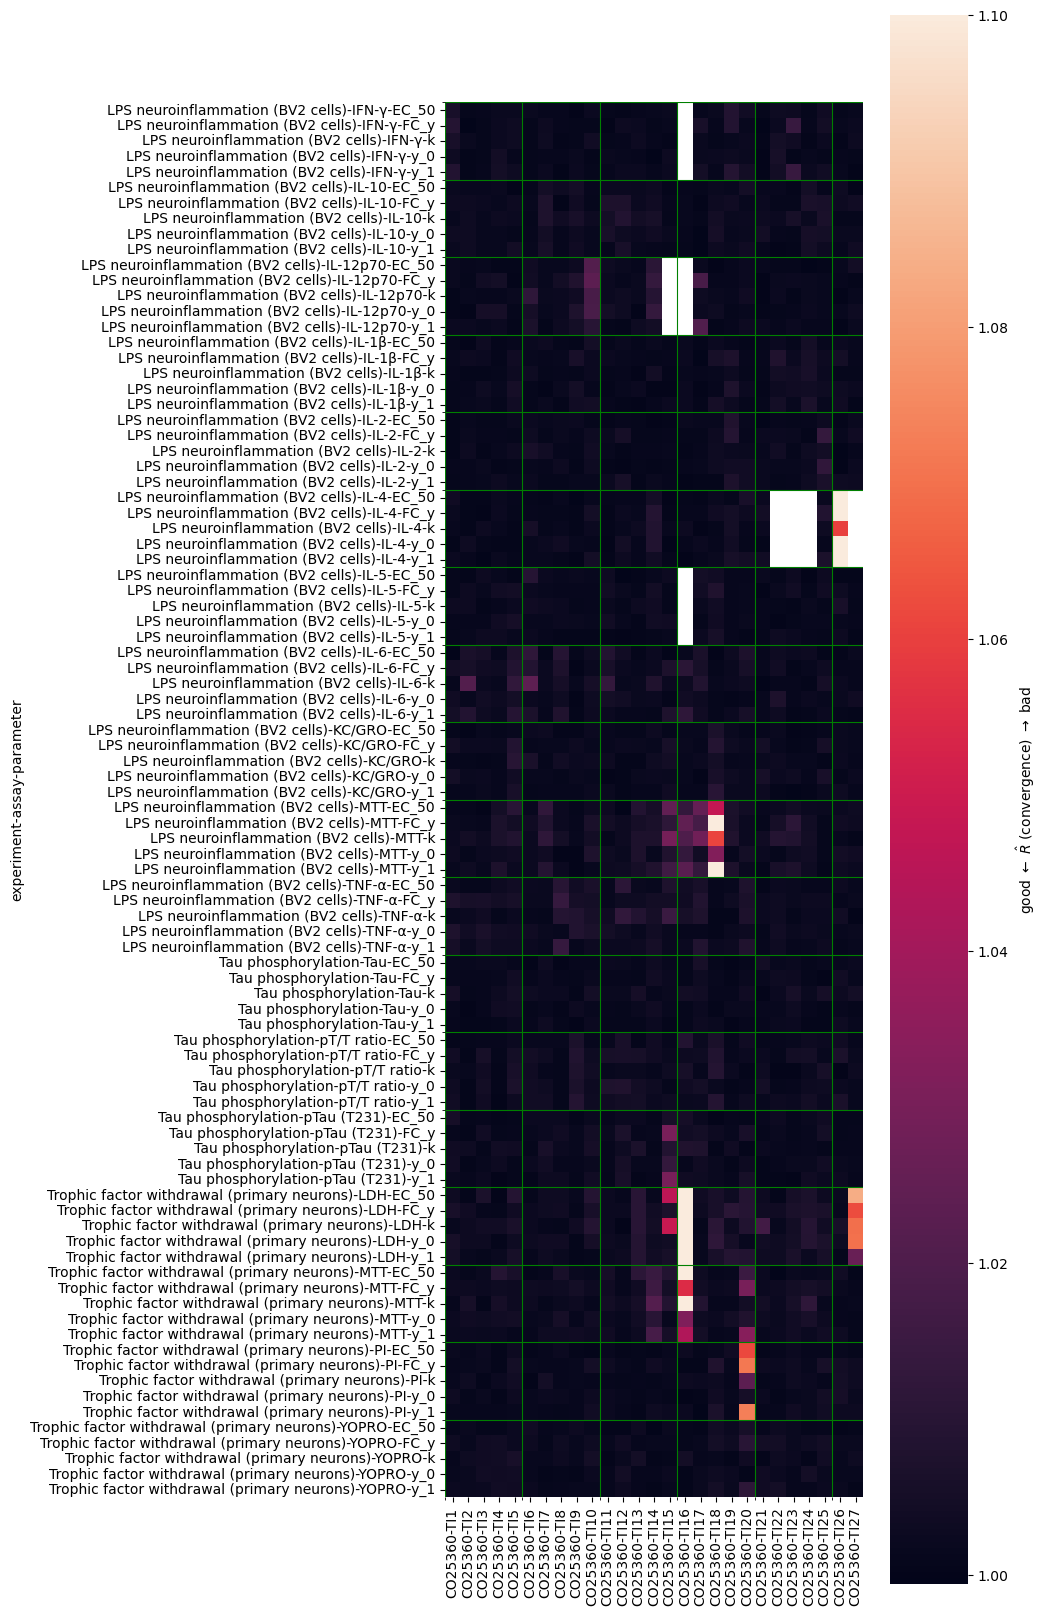

In [32]:
g = cba.diagnostics_series_heatmap(idatas, az.rhat, yticklabels=True, vmax=1.1)
attila_utils.savefig(g.figure, 'rhat')

['named-figure/mcse.png', 'named-figure/mcse.pdf']

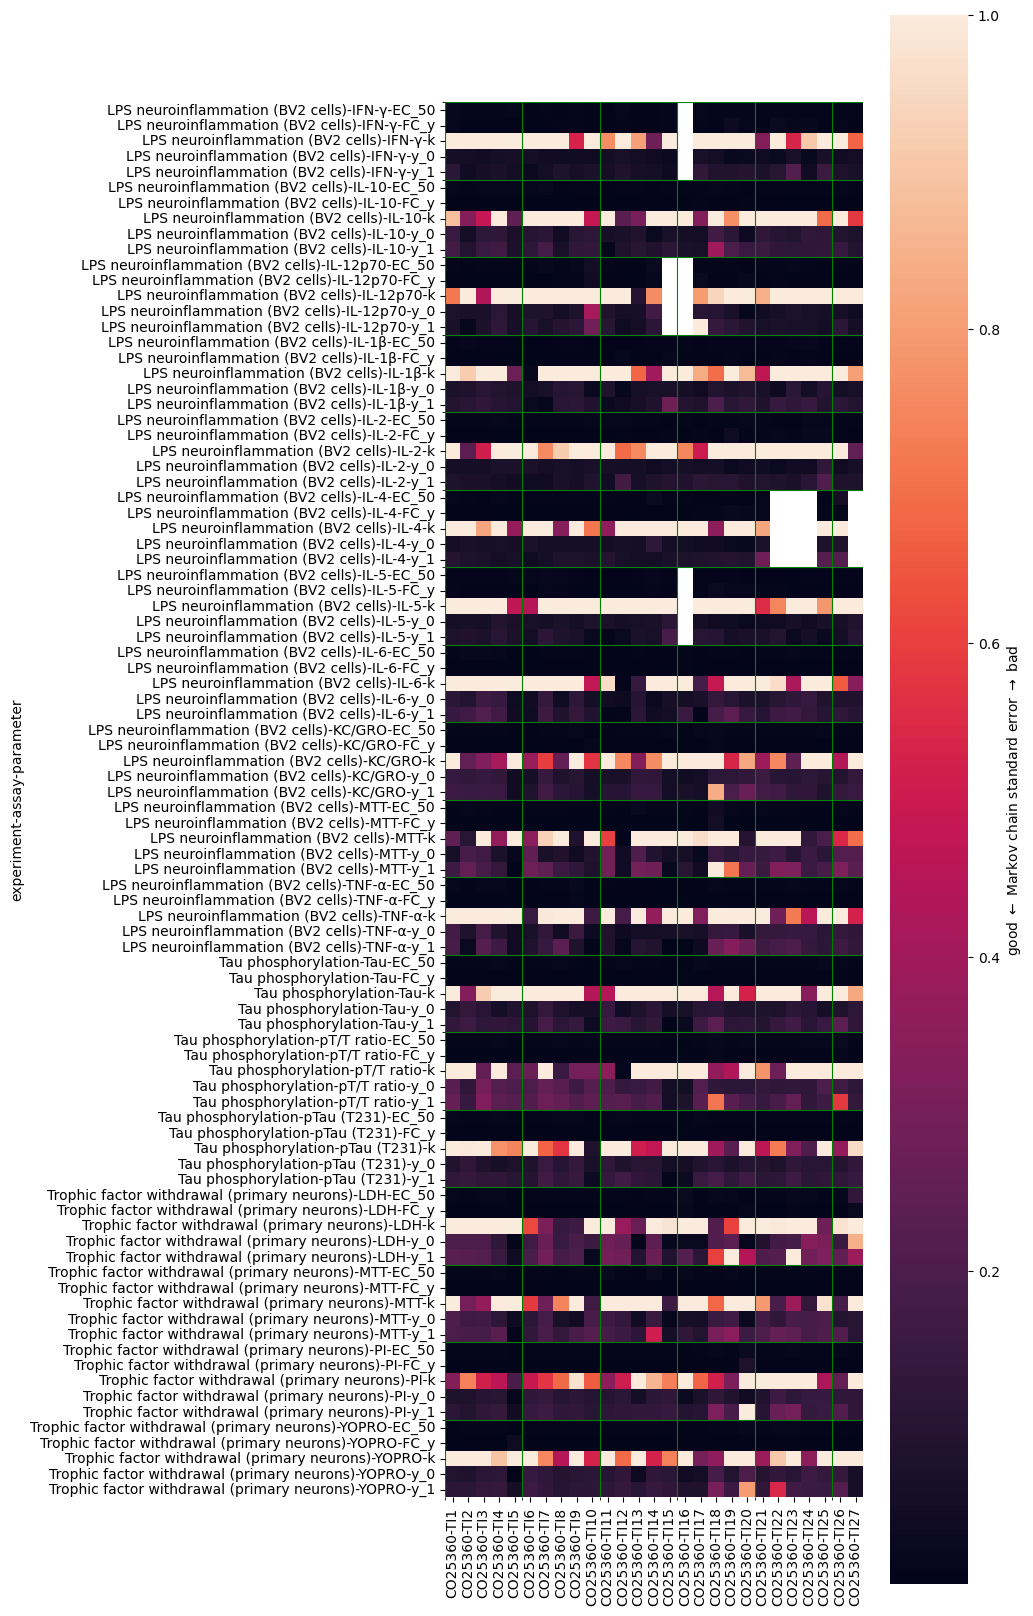

In [33]:
g = cba.diagnostics_series_heatmap(idatas, az.mcse, yticklabels=True, vmax=1)
attila_utils.savefig(g.figure, 'mcse')

In [34]:
poor_fits = []

In [35]:
fpath = '../../results/2024-05-14-cell-bayes/H102_posteriors.csv'
if not os.path.exists(fpath):
    H102_posteriors = cba.get_H102_posterior_from_idatas(idatas, poor_fits)
    H102_posteriors = cba.sort_index_TI(H102_posteriors)
    df = cba.get_TI_name('/Users/jonesa7/CTNS/resources/cell-based-assays/test-items3a-v2.csv')
    H102_posteriors['name'] = df.loc[H102_posteriors.index.to_frame().apply(lambda r: (r.loc['study'], r.loc['TI']), axis=1), 'Name'].to_list()
    H102_posteriors.to_csv(fpath)
else:
    H102_posteriors = pd.read_csv(fpath, index_col=[0, 1, 2, 3])
    
H102_posteriors

H1  \
study   experiment                                  assay TI              
CO25360 LPS neuroinflammation (BV2 cells)           IFN-γ TI1   0.57700   
                                                          TI2   0.91650   
                                                          TI3   0.14050   
                                                          TI4   0.36450   
                                                          TI5   0.74500   
...                                                                 ...   
        Trophic factor withdrawal (primary neurons) YOPRO TI23  0.00100   
                                                          TI24  0.00125   
                                                          TI25  0.00875   
                                                          TI26  0.00600   
                                                          TI27  0.58150   

                                                                     H0  \
study   experiment                                  assay TI              
CO25360 LPS neuroinflammation (BV2 cells)           IFN-γ TI1   0.39175   
                                                          TI2   0.08275   
                                                          TI3   0.77575   
                                                          TI4   0.60475   
                                                          TI5   0.25325   
...                                                                 ...   
        Trophic factor withdrawal (primary neurons) YOPRO TI23  0.87150   
                                                          TI24  0.88850   
                                                          TI25  0.91775   
                                                          TI26  0.96850   
                                                          TI27  0.41825   

                                                                     H2  \
study   experiment                                  assay TI              
CO25360 LPS neuroinflammation (BV2 cells)           IFN-γ TI1   0.03125   
                                                          TI2   0.00075   
                                                          TI3   0.08375   
                                                          TI4   0.03075   
                                                          TI5   0.00175   
...                                                                 ...   
        Trophic factor withdrawal (primary neurons) YOPRO TI23  0.12750   
                                                          TI24  0.11025   
                                                          TI25  0.07350   
                                                          TI26  0.02550   
                                                          TI27  0.00025   

                                                                             name  
study   experiment                                  assay TI                       
CO25360 LPS neuroinflammation (BV2 cells)           IFN-γ TI1       Valproic acid  
                                                          TI2          Salbutamol  
                                                          TI3          Sildenafil  
                                                          TI4          Probenecid  
                                                          TI5         Montelukast  
...                                                                           ...  
        Trophic factor withdrawal (primary neurons) YOPRO TI23         Rifampicin  
                                                          TI24        Mebendazole  
                                                          TI25      Pyrimethamine  
                                                          TI26           Arundine  
                                                          TI27  TUDCA + fixed HCQ  

[478 rows x 4 columns]

In [36]:
%connect_info

{
  "shell_port": 53442,
  "iopub_port": 53443,
  "stdin_port": 53444,
  "control_port": 53446,
  "hb_port": 53445,
  "ip": "127.0.0.1",
  "key": "0f5e2323-088fb4f21d080343e3285548",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-05-14-cell-bayes/Untitled.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-dac4df9e-d924-45ed-a0aa-26b0b33eafaa.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
